In [41]:
from pyspark.sql import SparkSession
spark = (SparkSession.builder.appName("suvam_capstone1")\
        .config("hive.metastore.uris","thrift://ip-10-1-2-24.ap-south-1.compute.internal:9083")\
        .enableHiveSupport().getOrCreate())

In [42]:
spark

### 1. List employee number, first name, last name, sex, salary for each employee

In [43]:
spark.sql("select e.emp_no, e.last_name, e.first_name, e.sex, s.salary\
    from suvamalabs.employeesorg e inner join suvamalabs.salaries s\
    on e.emp_no = s.emp_no").show()

+------+----------+----------+---+------+
|emp_no| last_name|first_name|sex|salary|
+------+----------+----------+---+------+
|473302|  Zallocco|  Hideyuki|  M| 40000|
|475053| Delgrande|     Byong|  F| 53422|
| 57444|      Babb|     Berry|  F| 48973|
|421786|  Verhoeff|     Xiong|  M| 40000|
|282238|   Baumann|Abdelkader|  F| 40000|
|263976|  Cusworth|      Eran|  M| 40000|
|273487|   Parfitt| Christoph|  M| 56087|
|461591|  Samarati|    Xudong|  M| 40000|
|477657| Magliocco|    Lihong|  M| 54816|
|219881|     Speek| Kwangyoen|  F| 40000|
| 29920|     Tyugu|   Shuichi|  F| 40000|
|208153|      Lunn|   Abdulah|  M| 50183|
| 13616|     Lorho|     Perry|  F| 40000|
|246449|Bultermann|     Subbu|  F| 87084|
| 21529|  Zallocco|     Bojan|  M| 40000|
| 17934|  Wuwongse|  Bilhanan|  M| 48795|
| 48085|      Gilg|Venkatesan|  M| 63016|
|239838|     Dulli|   Naftali|  M| 57715|
|240129|    Karnin|     Roddy|  M| 43548|
|205246|    Demizu|     Nevio|  F| 80252|
+------+----------+----------+---+

### 2. First name, last name, and hire date for employees who were hired in 1986

In [44]:
spark.sql("select first_name, last_name, hire_date\
    from suvamalabs.employeesorg\
    where hire_date LIKE '%1986'").show()

+----------+-----------+----------+
|first_name|  last_name| hire_date|
+----------+-----------+----------+
|      Eran|   Cusworth|11/14/1986|
|     Bojan|   Zallocco|10/14/1986|
|     Nevio|     Demizu| 5/18/1986|
|      Ziva|     Vecchi|  7/3/1986|
|     Mohit|      Speek| 1/14/1986|
|  Qunsheng|      Speer| 2/13/1986|
|     Dines|Encarnacion|  8/2/1986|
|  Harngdar|      Swick| 5/28/1986|
|    Freyja|      Uhrig|12/20/1986|
|   Zhenhua|    Milicic|  8/4/1986|
|     Bowen|   Schmezko| 5/30/1986|
|    Reuven|      Munke| 4/13/1986|
| Stabislas|    Domenig|  8/4/1986|
| Juichirou|   Jumpertz| 9/18/1986|
| Juichirou|     Ghelli|12/13/1986|
|    Shmuel|      Georg|11/30/1986|
|   Xiadong|       Bach| 4/29/1986|
| Guangming|Butterworth| 10/1/1986|
|     Irene|      Setia| 8/10/1986|
|   Shuichi|     Swiler|  6/8/1986|
+----------+-----------+----------+
only showing top 20 rows



###  3. List showing Manager of each department  with dept number, dept name, manager's emp number, last name and first name. 

In [45]:
spark.sql("select d.dept_no, d.dept_name, dm.emp_no, e.last_name, e.first_name\
    from suvamalabs.departments d inner join suvamalabs.dept_manager dm\
    on d.dept_no = dm.dept_no left join suvamalabs.employeesorg e\
    on e.emp_no = dm.emp_no").show()

+-------+--------------------+------+------------+-----------+
|dept_no|           dept_name|emp_no|   last_name| first_name|
+-------+--------------------+------+------------+-----------+
|   d001|         "Marketing"|110039|    Minakawa|   Vishwani|
|   d001|         "Marketing"|110022|  Markovitch|  Margareta|
|   d002|           "Finance"|110114|  Legleitner|      Isamu|
|   d002|           "Finance"|110085|       Alpin|       Ebru|
|   d003|   "Human Resources"|110228|     Sigstam|    Karsten|
|   d003|   "Human Resources"|110183|Ossenbruggen|    Shirish|
|   d004|        "Production"|110420|    Ghazalie|      Oscar|
|   d004|        "Production"|110386|      Kieras|       Shem|
|   d004|        "Production"|110344|       Cools|     Rosine|
|   d004|        "Production"|110303|     Wegerle|  Krassimir|
|   d005|       "development"|110567|    DasSarma|       Leon|
|   d005|       "development"|110511|    Hagimont|   DeForest|
|   d006|"Quality Management"|110854|       Pesch|     

### 4. List dept of each employee with emp number, last name, first name, dept name.

In [46]:
spark.sql("select e.emp_no, e.last_name, e.first_name, d.dept_name\
    from suvamalabs.employeesorg e inner join suvamalabs.dept_emp de\
    on e.emp_no = de.emp_no inner join suvamalabs.departments d\
    on de.dept_no = d.dept_no").show()

+------+----------+----------+--------------------+
|emp_no| last_name|first_name|           dept_name|
+------+----------+----------+--------------------+
|473302|  Zallocco|  Hideyuki|           "Finance"|
|475053| Delgrande|     Byong|        "Production"|
| 57444|      Babb|     Berry|        "Production"|
|421786|  Verhoeff|     Xiong|   "Human Resources"|
|282238|   Baumann|Abdelkader|"Quality Management"|
|263976|  Cusworth|      Eran|"Quality Management"|
|273487|   Parfitt| Christoph|   "Human Resources"|
|461591|  Samarati|    Xudong|           "Finance"|
|477657| Magliocco|    Lihong|"Quality Management"|
|219881|     Speek| Kwangyoen|  "Customer Service"|
| 29920|     Tyugu|   Shuichi|        "Production"|
|208153|      Lunn|   Abdulah|       "development"|
| 13616|     Lorho|     Perry|          "Research"|
| 13616|     Lorho|     Perry|       "development"|
|246449|Bultermann|     Subbu|             "Sales"|
| 21529|  Zallocco|     Bojan|       "development"|
| 17934|  Wu

### 5. List of employees first name, last name, sex with first name 'Hercules' and last name begin with 'B'.

In [47]:
spark.sql("select first_name, last_name, sex\
    from suvamalabs.employeesorg\
    where first_name LIKE 'Hercules' and\
        last_name LIKE 'B%'").show()

+----------+-------------+---+
|first_name|    last_name|sex|
+----------+-------------+---+
|  Hercules|         Baer|  M|
|  Hercules|        Biron|  F|
|  Hercules|        Birge|  F|
|  Hercules|      Berstel|  F|
|  Hercules|    Bernatsky|  M|
|  Hercules|         Bail|  F|
|  Hercules|       Bodoff|  M|
|  Hercules|     Benantar|  F|
|  Hercules|      Basagni|  M|
|  Hercules|Bernardinello|  F|
|  Hercules|   Baranowski|  M|
|  Hercules|      Bisiani|  F|
|  Hercules|   Benzmuller|  M|
|  Hercules|         Bahr|  M|
|  Hercules|        Biran|  F|
|  Hercules|         Bain|  F|
|  Hercules|      Brendel|  F|
|  Hercules|      Buchter|  M|
|  Hercules|     Barreiro|  M|
|  Hercules|         Baak|  M|
+----------+-------------+---+



### 6. List of all employees in Sales departments with their emp number, last name, first name, dept name.

In [48]:
spark.sql("""select de.emp_no, e.last_name, e.first_name, d.dept_name\
    from suvamalabs.departments d inner join suvamalabs.dept_emp de\
    on d.dept_no = de.dept_no inner join suvamalabs.employeesorg e\
    on de.emp_no = e.emp_no\
    where d.dept_name LIKE '%Sales%'""").show()

+------+------------+----------+---------+
|emp_no|   last_name|first_name|dept_name|
+------+------------+----------+---------+
| 10002|      Simmel|   Bezalel|  "Sales"|
| 10016| Cappelletti|  Kazuhito|  "Sales"|
| 10034|        Swan|     Bader|  "Sales"|
| 10041|      Lenart|       Uri|  "Sales"|
| 10050|      Dredge|   Yinghua|  "Sales"|
| 10053|    Zschoche|    Sanjiv|  "Sales"|
| 10060| Billingsley|  Breannda|  "Sales"|
| 10061|      Herber|       Tse|  "Sales"|
| 10068|     Brattka|  Charlene|  "Sales"|
| 10087|     Eugenio|   Xinglin|  "Sales"|
| 10088|    Syrzycki|  Jungsoon|  "Sales"|
| 10089|Flasterstein| Sudharsan|  "Sales"|
| 10093|     Desikan|   Sailaja|  "Sales"|
| 10095|      Morton|    Hilari|  "Sales"|
| 10099|     Sullins|    Valter|  "Sales"|
| 10101|      Heyers|     Perla|  "Sales"|
| 10107|        Baca|      Dung|  "Sales"|
| 10125|     Hiltgen|     Syozo|  "Sales"|
| 10136|    Pintelas|    Zissis|  "Sales"|
| 10148|       Azumi|    Douadi|  "Sales"|
+------+---

### 7. List of all employees in Sales and Development departments with their emp number, last name, first name, dept name.

In [49]:
spark.sql("""select de.emp_no, e.last_name, e.first_name, d.dept_name\
    from suvamalabs.departments d inner join suvamalabs.dept_emp de\
    on d.dept_no = de.dept_no inner join suvamalabs.employeesorg e\
    on de.emp_no = e.emp_no\
    where d.dept_name like '%Sales%' or d.dept_name like '%development%'""").show()

+------+-----------+----------+-------------+
|emp_no|  last_name|first_name|    dept_name|
+------+-----------+----------+-------------+
| 10001|    Facello|    Georgi|"development"|
| 10002|     Simmel|   Bezalel|      "Sales"|
| 10006|    Preusig|    Anneke|"development"|
| 10008|   Kalloufi|    Saniya|"development"|
| 10012|  Bridgland|  Patricio|"development"|
| 10014|      Genin|     Berni|"development"|
| 10016|Cappelletti|  Kazuhito|      "Sales"|
| 10018|       Peha|  Kazuhide|"development"|
| 10021|       Erde|     Ramzi|"development"|
| 10022|     Famili|    Shahaf|"development"|
| 10023| Montemayor|     Bojan|"development"|
| 10025|     Heyers| Prasadram|"development"|
| 10027|    Reistad|    Divier|"development"|
| 10028|   Tempesti|  Domenick|"development"|
| 10031|     Joslin|   Karsten|"development"|
| 10034|       Swan|     Bader|      "Sales"|
| 10037|   Makrucki|   Pradeep|"development"|
| 10040|    Meriste|     Weiyi|"development"|
| 10041|     Lenart|       Uri|   

### 8. List employee count with same last name

In [50]:
spark.sql("select last_name, count(last_name) as surname_count\
    from suvamalabs.employeesorg\
    group by last_name\
    order by count(last_name) desc").show()

+-----------+-------------+
|  last_name|surname_count|
+-----------+-------------+
|       Baba|          226|
|      Coorg|          223|
|     Gelosh|          223|
|     Farris|          222|
|    Sudbeck|          222|
|     Adachi|          221|
|     Osgood|          220|
|     Neiman|          218|
|    Mandell|          218|
|     Masada|          218|
|    Wendorf|          217|
|Boudaillier|          217|
|     Pettis|          216|
|     Mahnke|          216|
|    Solares|          216|
|   Cummings|          216|
|   Collette|          215|
|   Birjandi|          215|
|     Emmart|          215|
| Maksimenko|          215|
+-----------+-------------+
only showing top 20 rows



### 9. Histogram of Salary distribution

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

In [52]:
salaries = spark.sql("select * from suvamalabs.salaries")

In [53]:
salary = salaries.toPandas()

In [54]:
salary

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


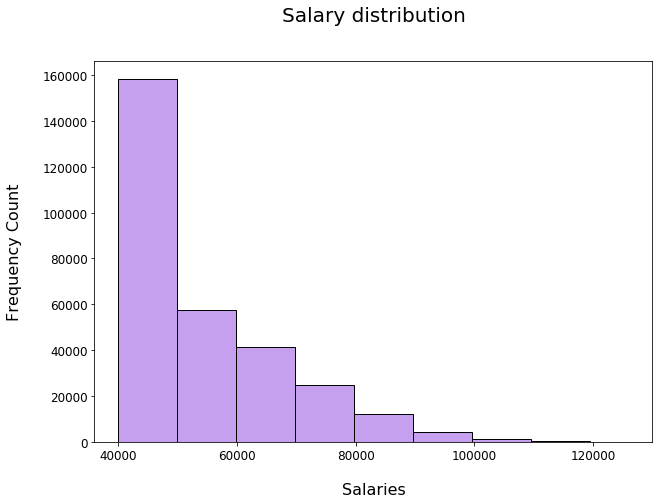

In [55]:
plt.rcParams['figure.figsize']=(10,7)
plt.hist(salary['salary'],bins=9,color='xkcd:lavender',alpha=1,edgecolor='black')
plt.title('Salary distribution',fontsize=20,pad=40)
plt.xlabel('Salaries',fontsize=16,color='black',labelpad=20)
plt.ylabel('Frequency Count',fontsize=16,color='black',labelpad=20)
plt.xlim(36000,130000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [56]:
plt.savefig('employee_salary_distribution.png')

plt.show()

<Figure size 720x504 with 0 Axes>

In [57]:
spark.sql("select bins, count(*)\
    from suvamalabs.bins\
    group by bins").show()

+---------+--------+
|     bins|count(1)|
+---------+--------+
|  70k-80k|   24814|
|  80k-90k|   11845|
|110k-120k|     195|
| 90k-100k|    4284|
|  40k-50k|  158465|
|  60k-70k|   41413|
|  50k-60k|   57915|
|120k-130k|      24|
|100k-110k|    1069|
+---------+--------+



### 10. Average salary per designation usng Bar Chart 

In [58]:
Avg_salary = spark.sql("select t.title, avg(s.salary) as avg_salary\
    from suvamalabs.employeesorg e inner join suvamalabs.titles t\
    on e.emp_title = t.title_id inner join suvamalabs.salaries s\
    on e.emp_no = s.emp_no group by t.title")

In [59]:
Avg_Sal = Avg_salary.toPandas()

In [60]:
Avg_Sal

,title,avg_salary
0,Staff,58465.382850
1,Assistant Engineer,48564.434447
2,Senior Staff,58550.172704
3,Senior Engineer,48506.799871
4,Engineer,48535.336511
5,Manager,51531.041667
6,Technique Leader,48582.896092


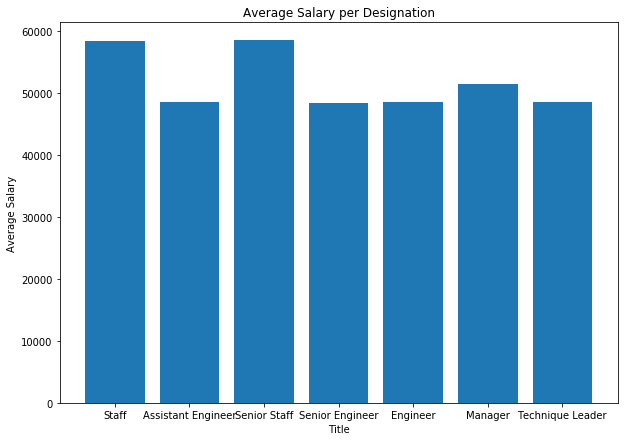

In [61]:
plt.rcParams['figure.figsize']=(10,7)
plt.bar(Avg_Sal['title'], Avg_Sal['avg_salary'])
plt.xlabel("Title")
plt.ylabel("Average Salary")
plt.title("Average Salary per Designation")

plt.show()

### 11. Employees tenure

In [62]:
emp_ten = spark.sql("select count(emp_no) as total_emp,case   \
                when left_year is null then (2013-hire_year)\
                else (left_year - hire_year)\
                end as tenure\
            from suvamalabs.employees_tenure\
            group by case    \
                when left_year is null then (2013-hire_year)\
                else (left_year - hire_year)\
                end\
            order by tenure")

In [63]:
emp_tenure = emp_ten.toPandas()

In [64]:
emp_tenure

,total_emp,tenure
0,266,1
1,1739,2
2,2049,3
3,2020,4
4,2022,5
5,1977,6
6,1939,7
7,1992,8
8,1980,9
9,1985,10


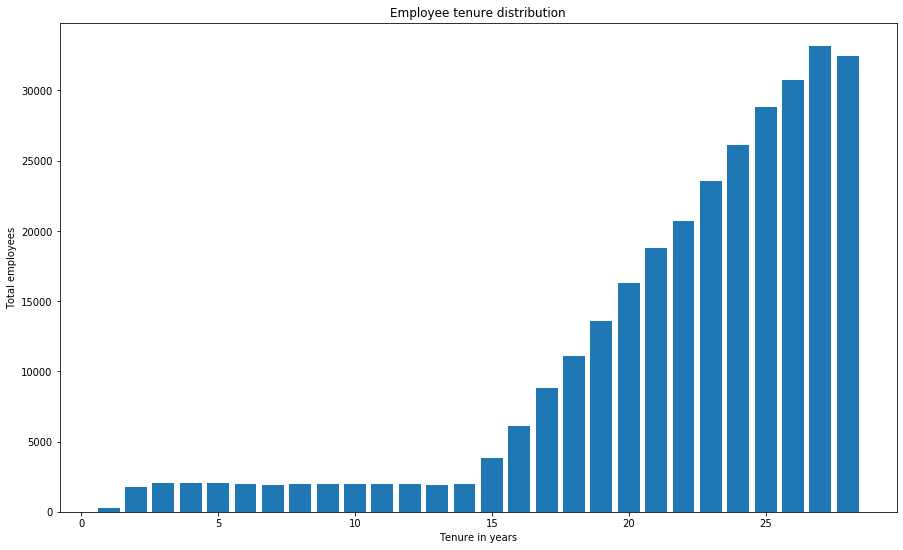

In [65]:
plt.rcParams['figure.figsize']=(15,9)
plt.bar(emp_tenure['tenure'], emp_tenure['total_emp'])
plt.xlabel("Tenure in years")
plt.ylabel("Total employees")
plt.title("Employee tenure distribution")

plt.show()

### 12. Net expenditure each department

In [69]:
dept_exp = spark.sql("SELECT d.dept_name, SUM(s.salary) AS total\
            FROM suvamalabs.departments d LEFT JOIN suvamalabs.dept_emp de \
                ON d.dept_no = de.dept_no INNER JOIN suvamalabs.employeesorg e \
                ON de.emp_no = e.emp_no INNER JOIN suvamalabs.salaries s \
                ON e.emp_no = s.emp_no GROUP BY d.dept_name")

In [71]:
dept_exp = dept_exp.toPandas()

In [72]:
dept_exp

,dept_name,total
0,"""Quality Management""",934555467
1,"""Production""",3583161729
2,"""development""",4173702462
3,"""Research""",1032009108
4,"""Sales""",3648379483
5,"""Finance""",1032668378
6,"""Human Resources""",794654412
7,"""Marketing""",1234809182
8,"""Customer Service""",1131808649


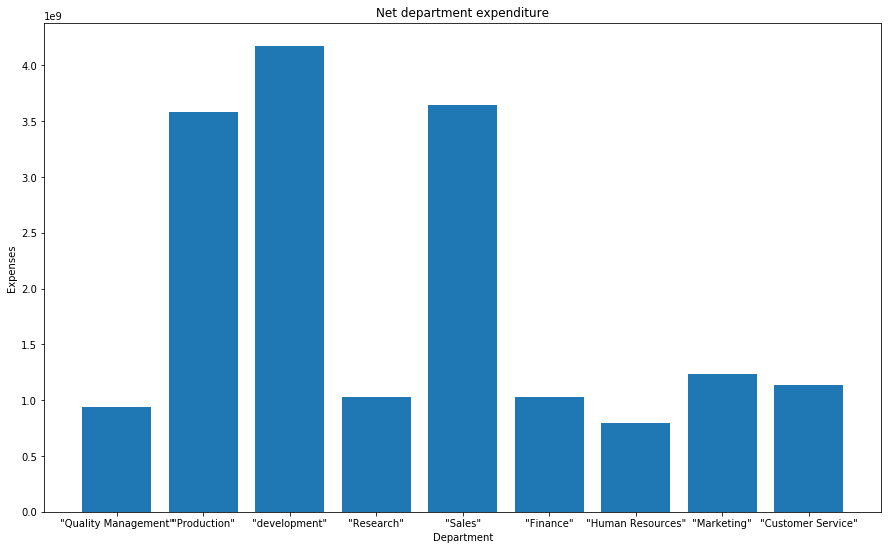

In [74]:
plt.rcParams['figure.figsize']=(15,9)
plt.bar(dept_exp['dept_name'], dept_exp['total'])
plt.xlabel("Department")
plt.ylabel("Expenses")
plt.title("Net department expenditure")

plt.show()

### 13. Sex ratio department wise

In [77]:
spark.sql("SELECT d.dept_name, SUM(CASE WHEN e.sex = 'M' THEN 1 ELSE 0 END) AS Male_Count, \
                 SUM(CASE WHEN e.sex = 'F' THEN 1 ELSE 0 END) AS Female_Count, \
        COUNT(IF(e.sex = 'M', 1, NULL))/COUNT(IF(e.sex = 'F', 1, NULL)) as ratio\
        FROM suvamalabs.employeesorg e LEFT JOIN suvamalabs.dept_emp de \
        ON e.emp_no = de.emp_no INNER JOIN suvamalabs.departments d \
        ON d.dept_no = de.dept_no GROUP BY d.dept_name").show()

+--------------------+----------+------------+------------------+
|           dept_name|Male_Count|Female_Count|             ratio|
+--------------------+----------+------------+------------------+
|"Quality Management"|     12039|        8078| 1.490344144590245|
|        "Production"|     43936|       29549|1.4868861890419303|
|       "development"|     51449|       34258|1.5018097962519703|
|          "Research"|     12687|        8439| 1.503377177390686|
|             "Sales"|     31391|       20854|1.5052747674307088|
|           "Finance"|     10331|        7015|1.4727013542409124|
|   "Human Resources"|     10711|        7075| 1.513922261484099|
|         "Marketing"|     12174|        8037|1.5147443075774543|
|  "Customer Service"|     14132|        9448| 1.495766299745978|
+--------------------+----------+------------+------------------+



### 14. Highest paid employee

In [78]:
spark.sql("SELECT d.dept_name, e.first_name, e.last_name, s.salary\
            FROM suvamalabs.departments d LEFT JOIN suvamalabs.dept_emp de \
                ON d.dept_no = de.dept_no INNER JOIN suvamalabs.employeesorg e \
                ON de.emp_no = e.emp_no INNER JOIN suvamalabs.salaries s \
                ON e.emp_no = s.emp_no\
            ORDER BY s.salary LIMIT 1").show()

+-------------+----------+---------+------+
|    dept_name|first_name|last_name|salary|
+-------------+----------+---------+------+
|"development"|    Anneke|  Preusig| 40000|
+-------------+----------+---------+------+



### 15. Number of employees at each designation

In [79]:
spark.sql("SELECT t.title, COUNT(*) AS total_employees\
        FROM suvamalabs.employeesorg e INNER JOIN suvamalabs.titles t \
            ON e.emp_title = t.title_id GROUP BY t.title").show()

+------------------+---------------+
|             title|total_employees|
+------------------+---------------+
|             Staff|         107384|
|Assistant Engineer|           5835|
|      Senior Staff|          26583|
|   Senior Engineer|          97747|
|          Engineer|          47303|
|           Manager|             24|
|  Technique Leader|          15148|
+------------------+---------------+



### 16. Performance rating frequency

In [82]:
spark.sql("SELECT e.last_performance_rating, d.dept_name, COUNT(*) AS total_emp\
            FROM suvamalabs.departments d LEFT JOIN suvamalabs.dept_emp de \
                ON d.dept_no = de.dept_no INNER JOIN suvamalabs.employeesorg e \
                ON de.emp_no = e.emp_no\
            GROUP BY e.last_performance_rating, d.dept_name ORDER BY total_emp DESC").show()

+-----------------------+--------------------+---------+
|last_performance_rating|           dept_name|total_emp|
+-----------------------+--------------------+---------+
|                      B|       "development"|    30609|
|                      A|       "development"|    27233|
|                      B|        "Production"|    26233|
|                      A|        "Production"|    23531|
|                      C|       "development"|    20372|
|                      B|             "Sales"|    18764|
|                      C|        "Production"|    17477|
|                      A|             "Sales"|    16641|
|                      C|             "Sales"|    12427|
|                      B|  "Customer Service"|     8462|
|                      A|  "Customer Service"|     7478|
|                      B|          "Research"|     7438|
|                      B|"Quality Management"|     7244|
|                      B|         "Marketing"|     7147|
|                      A|      